# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [3]:
data.shape

(1573, 43)

In [4]:
print('Shape of the data', data.shape)
print(data.isnull().sum()) #checking how many values are not filled in each column
data = data.drop_duplicates() # removing the duplicates if any
print('Shape of the data after dropping the duplicates', data.shape)

Shape of the data (1573, 43)
title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory

In [5]:
print('{:<30} {:<15}'.format('column', 'unique values'))
for key in data.keys():
    uniques = len(data[str(key)].unique())
    print('{:<30} {:<15}'.format(str(key) , uniques)) #prints how many unique values are present in a column
    if uniques <= 20 : # If a column has less than or equal to 20 values, it shows the categories
         print('\t:', data[str(key)].unique())

column                         unique values  
title                          1201           
title_orig                     1203           
price                          127            
retail_price                   104            
currency_buyer                 1              
	: ['EUR']
units_sold                     15             
	: [   100  20000   5000     10  50000   1000  10000 100000     50      1
      7      2      3      8      6]
uses_ad_boosts                 2              
	: [0 1]
rating                         192            
rating_count                   761            
rating_five_count              606            
rating_four_count              441            
rating_three_count             385            
rating_two_count               263            
rating_one_count               331            
badges_count                   4              
	: [0 1 2 3]
badge_local_product            2              
	: [0 1]
badge_product_quality          2              
	

# **The above numbers shows that:**

* 1201 unque items are listed as 1573 items over 958 unique sellers
* Only 473 items have urgency banner
* has_urgency_barrier is binary
* There are only two kinds of urgency texts, if present
* Products are available from 6 different countries
* 45 items have no ratings
* Most merchants (1347/1573) don't have profile picture
* All the items are priced in Euro

In [6]:
data.duplicated().any()

False

# Dropping unnecessary feature

In [7]:
data.drop(['title', 'currency_buyer', 'urgency_text','merchant_info_subtitle',
 'merchant_profile_picture', 'product_url',
'product_picture', 'product_id', 'theme', 'inventory_total', 'crawl_month'], axis = 1, inplace = True)

# Checking null values in the dataset

In [8]:
null_val = pd.DataFrame(data.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(data.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:10]

,null_val,percent_
has_urgency_banner,1071,70.0
rating_three_count,43,3.0
rating_four_count,43,3.0
product_color,41,3.0
rating_one_count,43,3.0
rating_two_count,43,3.0
rating_five_count,43,3.0
origin_country,16,1.0
product_variation_size_id,14,1.0
shipping_option_name,0,0.0


In [9]:
data.drop(columns = 'has_urgency_banner', axis = 1, inplace = True)
data = data.dropna().reset_index()
data.drop(columns = ['index'], axis = 1, inplace = True)
data.isnull().sum()[:10]

title_orig            0
price                 0
retail_price          0
units_sold            0
uses_ad_boosts        0
rating                0
rating_count          0
rating_five_count     0
rating_four_count     0
rating_three_count    0
dtype: int64

In [10]:
data.shape

(1427, 31)

In [11]:
data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,...,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1.427000e+03,1427.000000,1427.000000
mean,8.393399,23.489138,4417.238262,0.440084,3.781920,902.714085,438.840925,177.786265,131.689559,61.679047,...,0.016819,0.072880,0.011913,33.223546,2.355992,0.001402,40.233357,2.405446e+04,4.030408,0.148563
std,3.895748,30.825102,9111.863047,0.496571,0.475766,1944.595887,964.990878,391.434356,298.292520,140.973670,...,0.128636,0.260031,0.108533,21.253985,1.008087,0.037424,19.638695,7.053104e+04,0.194241,0.355782
min,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,3.000000e+00,2.941176,0.000000
25%,5.860000,7.000000,100.000000,0.000000,3.530000,28.000000,13.000000,5.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,31.000000,2.077000e+03,3.922890,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.830000,181.000000,84.000000,33.000000,26.000000,12.000000,...,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,8.191000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.090000,894.500000,418.000000,170.500000,133.500000,64.000000,...,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,2.354700e+04,4.155932,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,2.174765e+06,4.577519,1.000000


In [12]:
data.head(10)

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,4,0,34,CN,zgrdejia,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,2,0,41,CN,SaraHouse,sarahouse,17752,3.899673,56458aa03a698c35c9050988,0
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,3,0,36,CN,hxt520,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,2,0,41,CN,allenfan,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,1,0,35,CN,youngpeopleshop,happyhorses,14482,4.001588,5ab3b592c3911a095ad5dadb,0
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.0,0.0,0.0,...,1,0,40,CN,zhoulinglinga,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,0
6,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,50000,0,3.84,6742,3172.0,1352.0,971.0,...,2,0,31,CN,Unique Li Fashion Shop,uniquelifashionshopbb657bfe91d211e598c7063a14d...,10194,4.076516,5652f4053a698c76dc9a3f37,1
7,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,1000,0,3.76,286,120.0,56.0,61.0,...,3,0,139,CN,So Band,soband,342,3.681287,5d45349676befe65691dcfbb,0
8,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,100,1,3.47,15,6.0,2.0,3.0,...,2,0,36,CN,chenxiangjunjun,chenxiangjunjun,330,3.803030,5d42980e8388970d32294ddc,0
9,Summer Women Plus Size Casual Loose V Neck Sho...,5.78,22,5000,0,3.60,687,287.0,128.0,92.0,...,2,0,33,CN,Luowei clothe,luoweiclothe,5534,3.999819,5ba2251b4315d12ebce873fa,0


# Scatterplot Analysis: Product Rating vs. Units Sold

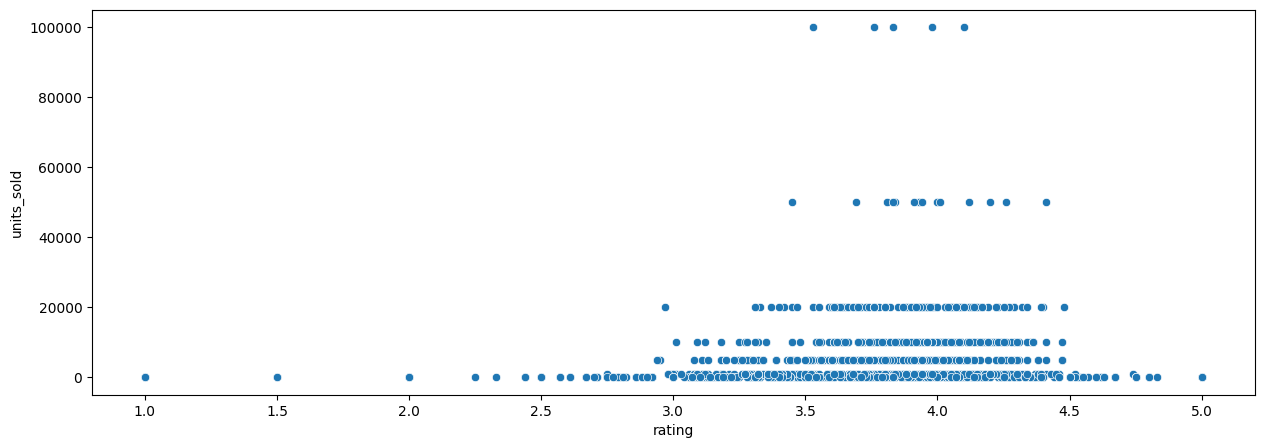

In [13]:
plt.figure(figsize=(15,5),dpi=100)
sns.scatterplot(data=data,x='rating',y='units_sold');

# Exploring the Distribution of Prices for Summer Products

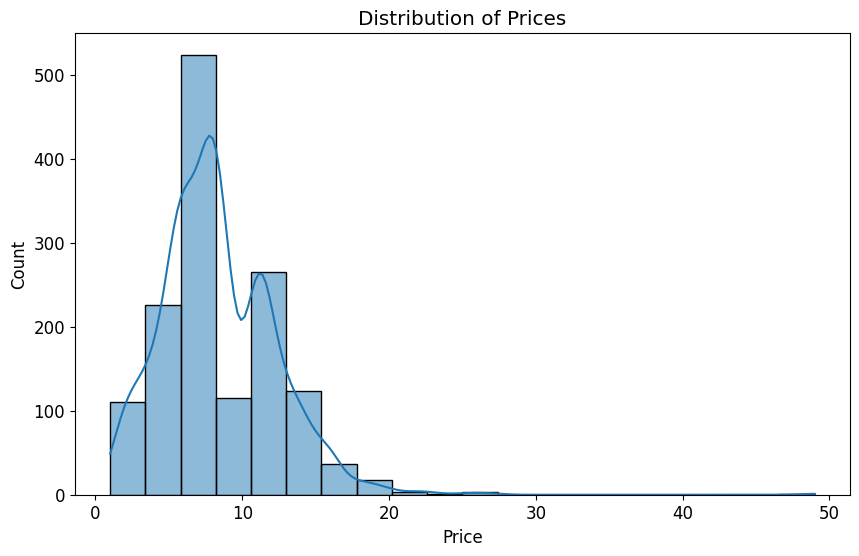

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Analysis of Price Distribution and Outliers in Summer Items

<ipython-input-30-797c52fc3a0d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price, bins=15)


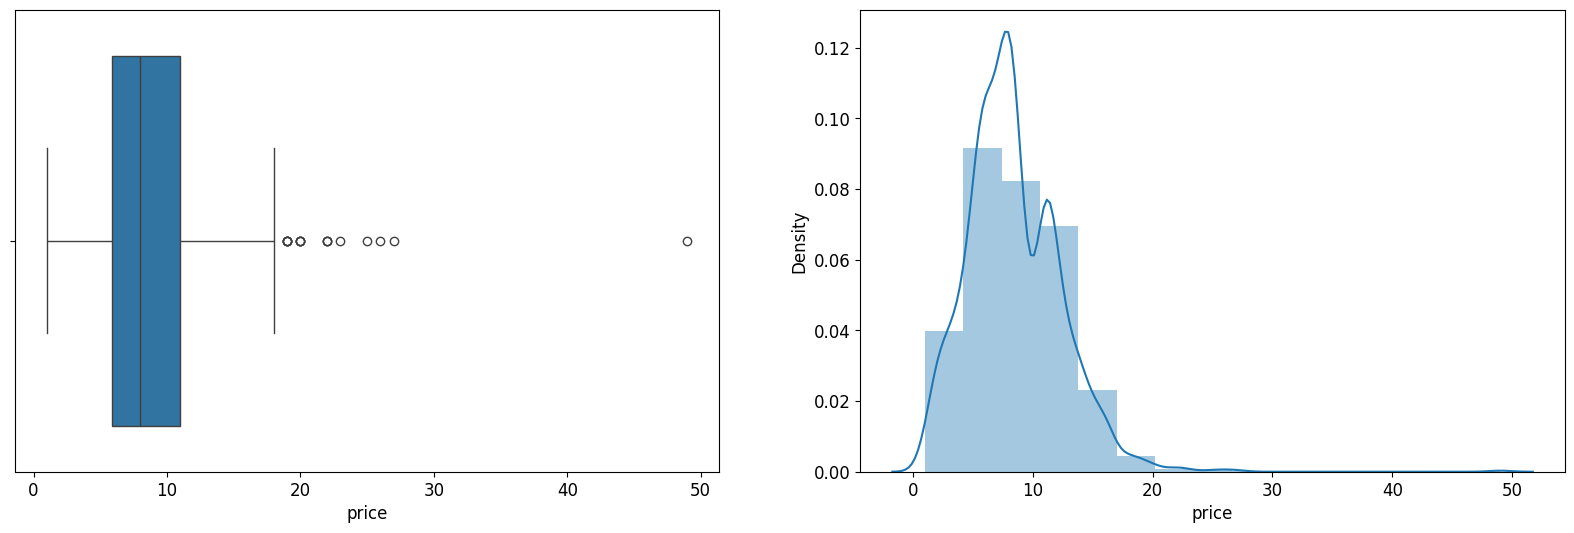

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='price')
plt.subplot(1,2,2)
sns.distplot(data.price, bins=15)
plt.show()

# Analysis of Retail Price Distribution and Outliers in Summer Items

<ipython-input-31-a8903d95dad6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.retail_price, bins=15)


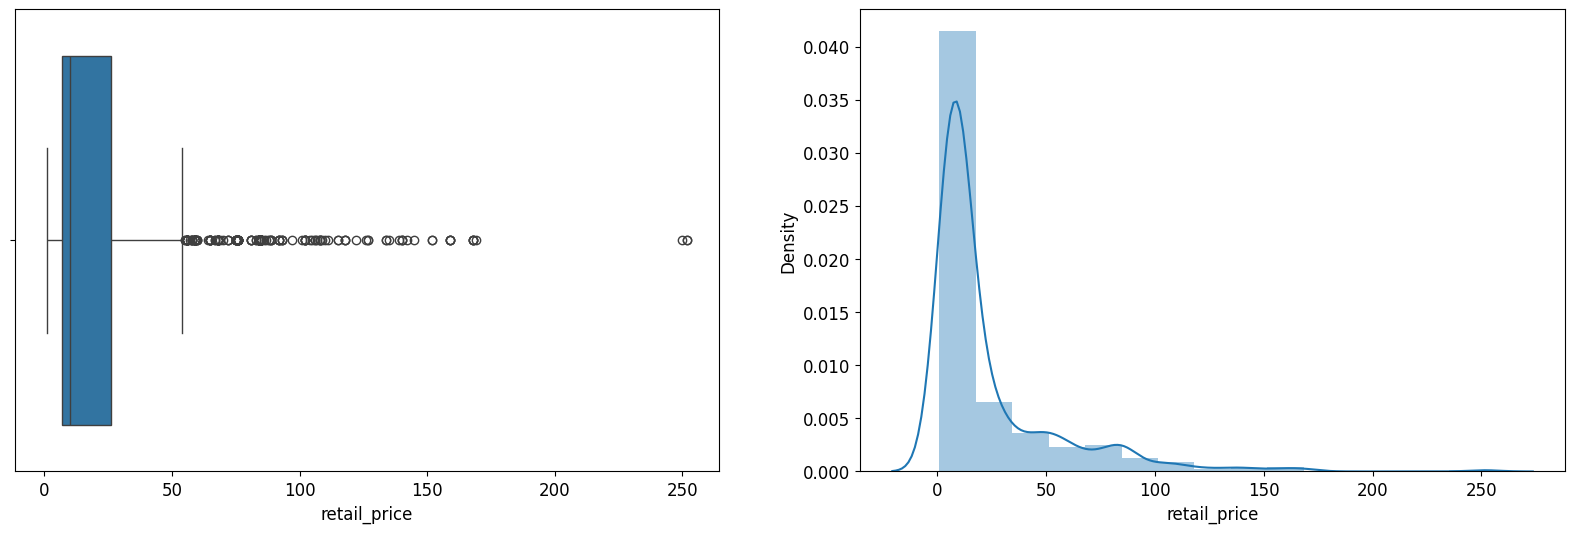

In [31]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='retail_price')
plt.subplot(1,2,2)
sns.distplot(data.retail_price, bins=15)
plt.show()

# Frequency of Origin Countries for Summer Products

<ipython-input-15-b87f991dfcaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='origin_country',palette='magma')


<Axes: xlabel='origin_country', ylabel='count'>

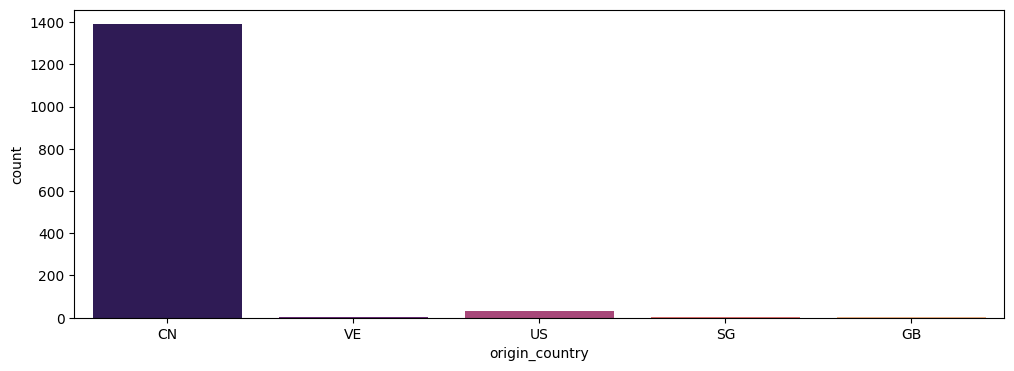

In [15]:
plt.figure(figsize=(12,4),dpi=100)
sns.countplot(data=data,x='origin_country',palette='magma')

# Pairwise Relationships Between Product Attributes

In [37]:
corr_col = data[['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count','badges_count','badge_local_product', 'badge_product_quality',
       'badge_fast_shipping','product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to', 'merchant_rating_count',
       'merchant_rating']]

In [38]:
variable = data[['price', 'retail_price', 'units_sold', 'rating', 'merchant_rating']]

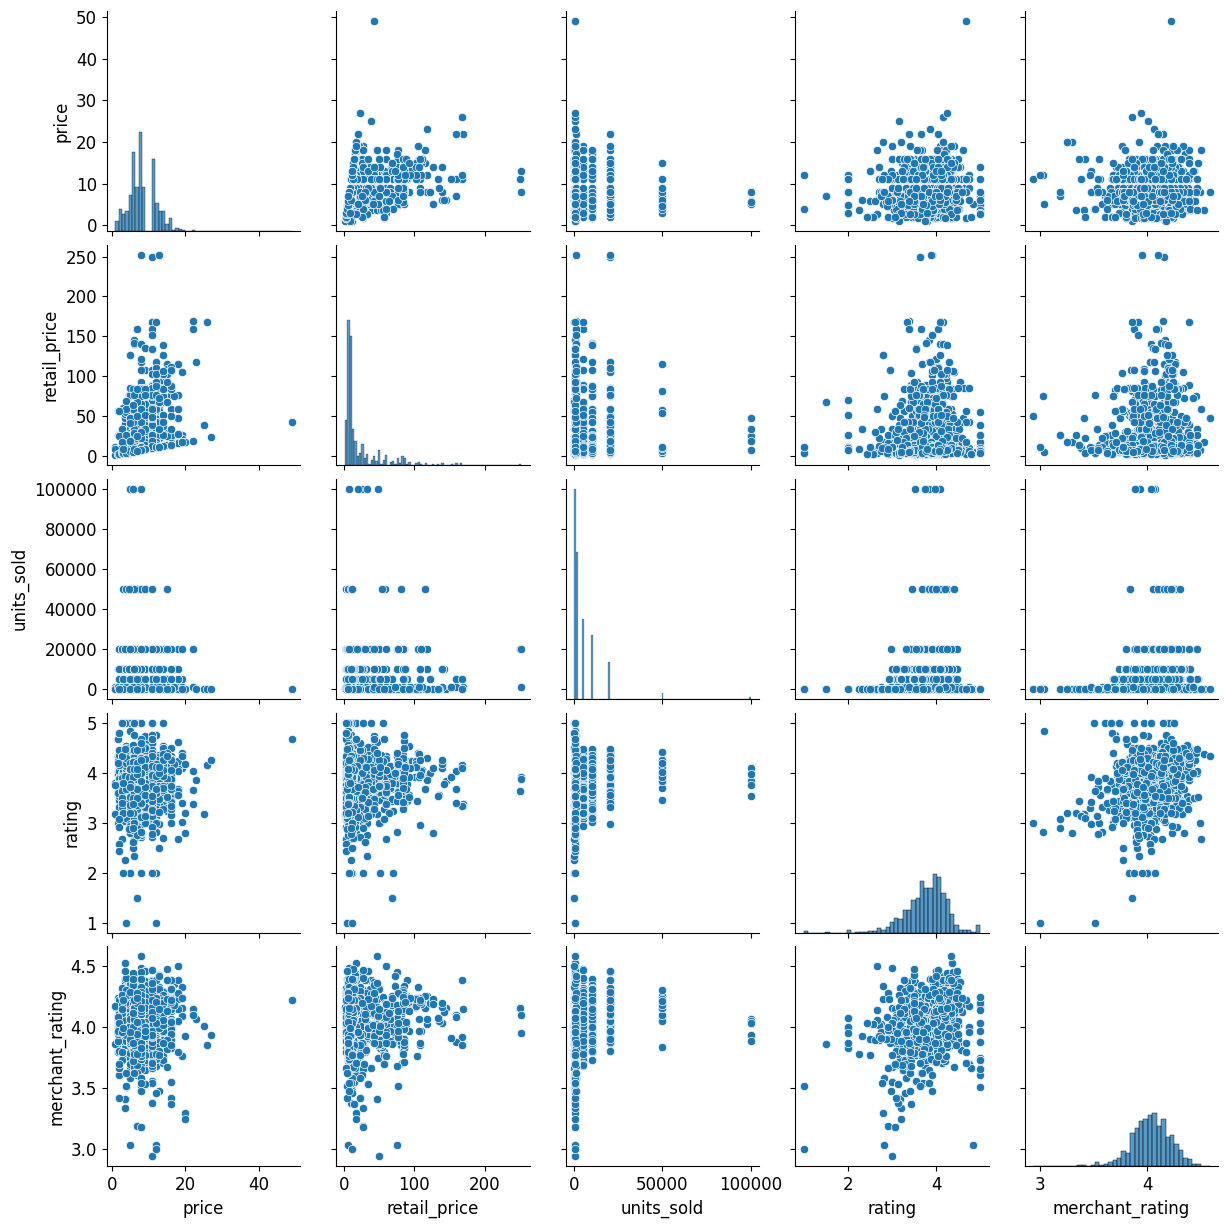

In [39]:
sns.pairplot(variable)
plt.show()


# Heatmap of Correlations Among Key Product Features

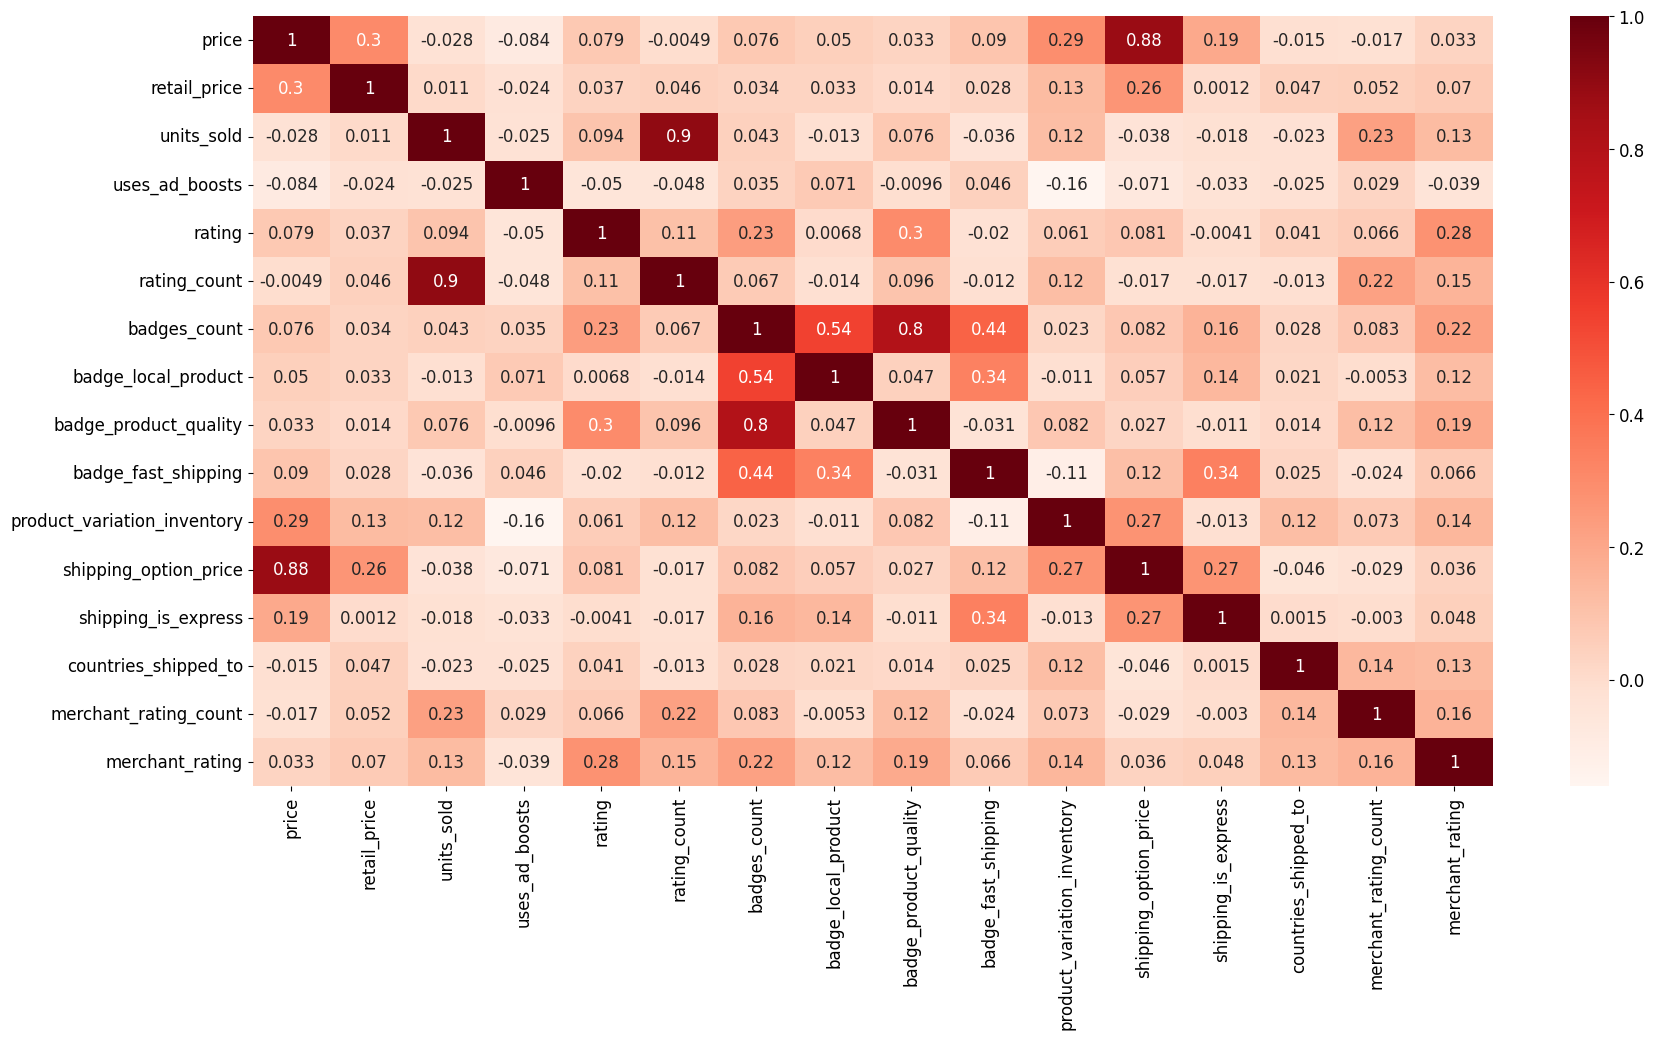

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_col.corr(), annot= True, cmap='Reds')
plt.show()

# Distribution of Product Ratings

<ipython-input-47-96d08ccc03d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'], kde = False, color = 'r', bins = 30)


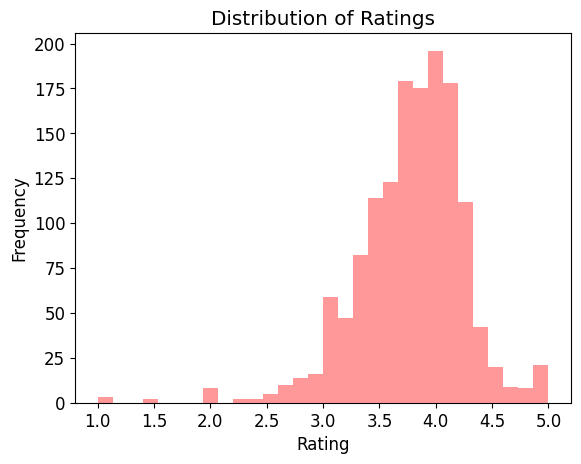

In [47]:
sns.distplot(data['rating'], kde = False, color = 'r', bins = 30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average Rating by Country

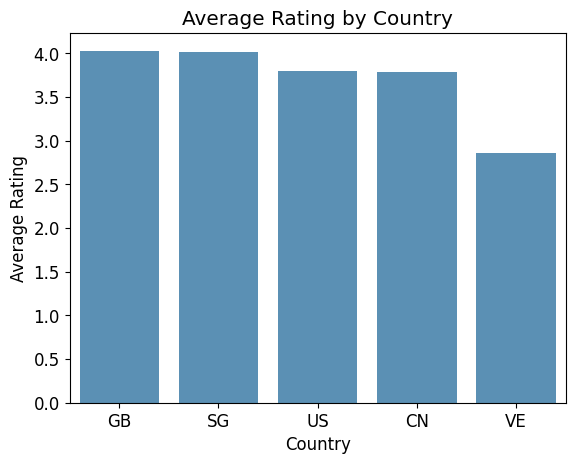

In [48]:
avg_rating_by_country = data.groupby('origin_country')['rating'].mean().sort_values(ascending = False)
sns.barplot(x = avg_rating_by_country.index, y = avg_rating_by_country.values, alpha = 0.8)
plt.title('Average Rating by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

# Impact of using ad boost on sales

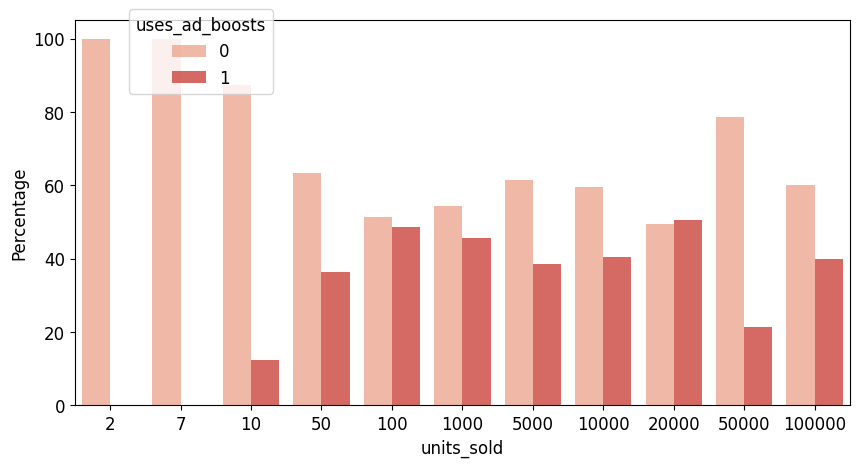

In [46]:
plt.figure(figsize=(10,5))
ad_sales = (data.groupby(['units_sold'])['uses_ad_boosts'].value_counts(normalize=True).rename('Percentage').mul(100)
            .reset_index())
# print(merch_pic)
sns.barplot(x='units_sold', y='Percentage', hue='uses_ad_boosts', data=ad_sales, palette="Reds", alpha=0.8)
plt.legend(title='uses_ad_boosts', loc=(0.07,0.81))

# Top 10 Summer Product Merchants by Average Customer Rating

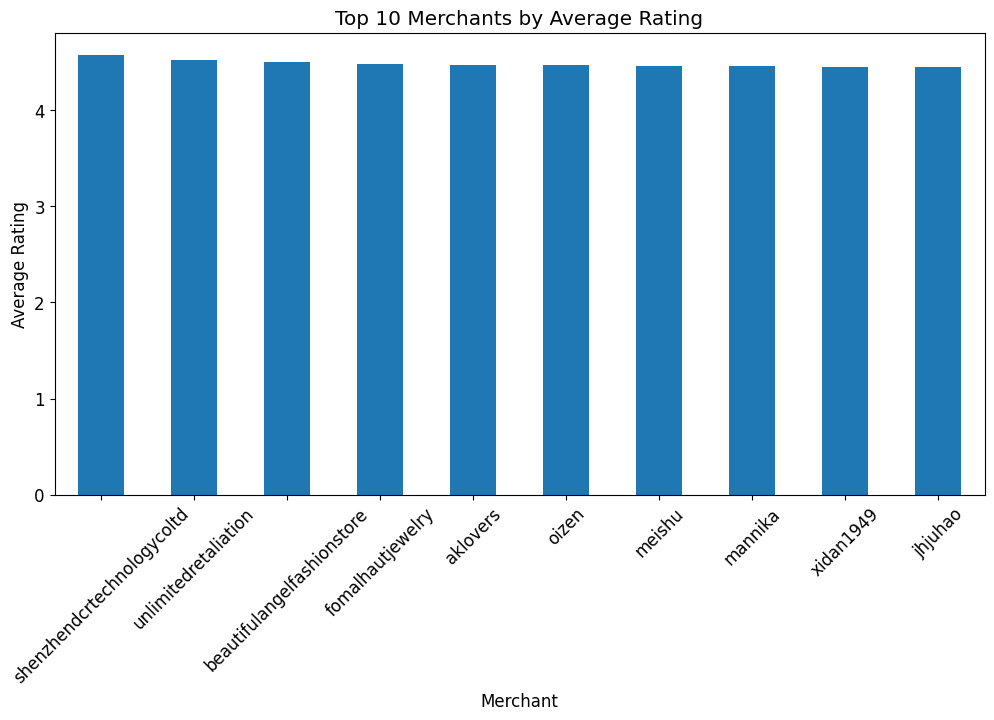

In [27]:
top_merchants = data.groupby('merchant_name')['merchant_rating'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
top_merchants.plot(kind='bar')
plt.title('Top 10 Merchants by Average Rating')
plt.xlabel('Merchant')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()